In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

data_train = pd.read_csv('./train.csv')
plt.style.use('seaborn') # plt에 seaborn cheme 지정
sns.set(font_scale=2.5) # 그래프 font size 지정

import missingno as msno

import warnings
warnings.filterwarnings('ignore') #워닝 메세지 생략

%matplotlib inline

참고 Kaggle : https://www.kaggle.com/code/jeongjaenam/guide-kor-dg

In [2]:
os.listdir("../Titanic")

['.ipynb_checkpoints',
 'sample_submission.csv',
 'test.csv',
 'titanic_first_try.ipynb',
 'Titanic_kaggle.ipynb',
 'train.csv']

In [3]:
df_train = pd.read_csv("../Titanic/train.csv")
df_test = pd.read_csv("../Titanic/test.csv")
df_submit = pd.read_csv("../Titanic/sample_submission.csv")

In [4]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# 결측치 확인
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [11]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

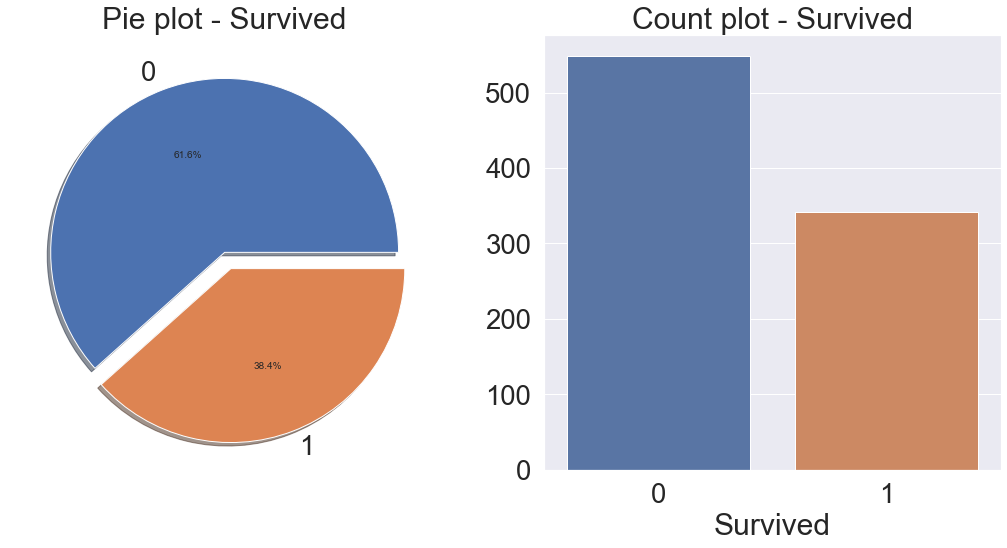

In [12]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct="%1.1f%%", ax = ax[0],
                                             shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')
ax[1].set_ylabel('')
plt.show()

### 탐색적 데이터 분석 (EDA)
#### 시각화 라이브러리 ex: matplotlib, seaborn, plotly

- Pclass

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


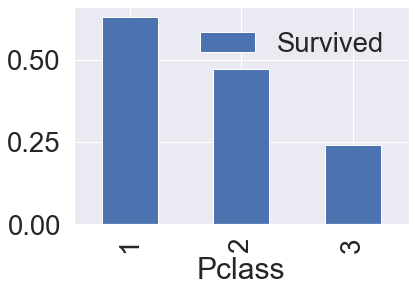

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().plot.bar()

Pclass에 따라서 생존율이 많이 달라지는것을 확인할 수 있습니다.

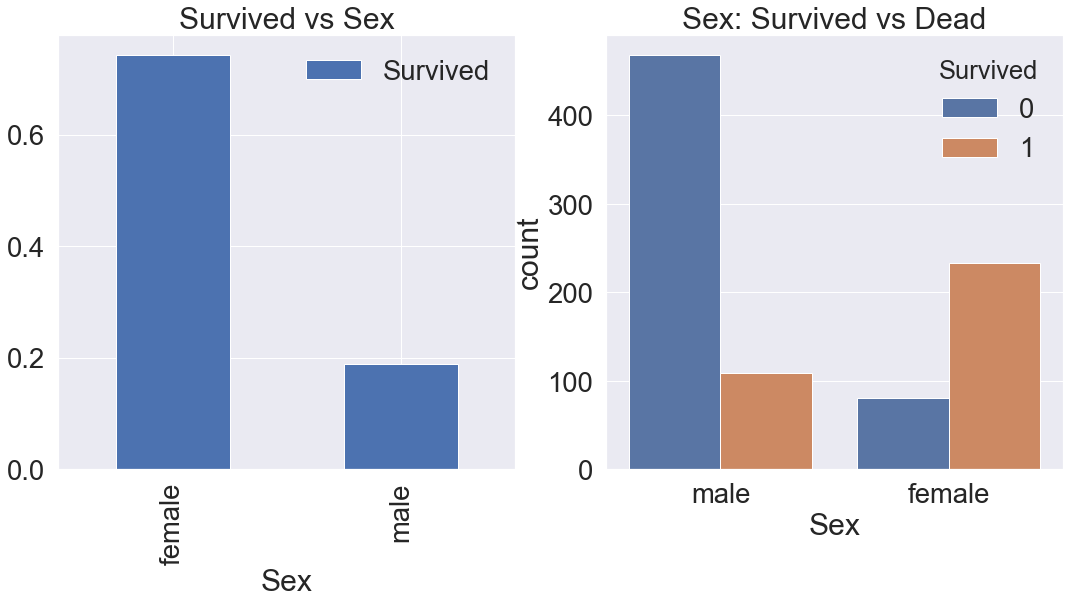

In [18]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = "Survived", data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여성의 생존확률이 높습니다. --> 중요 feature

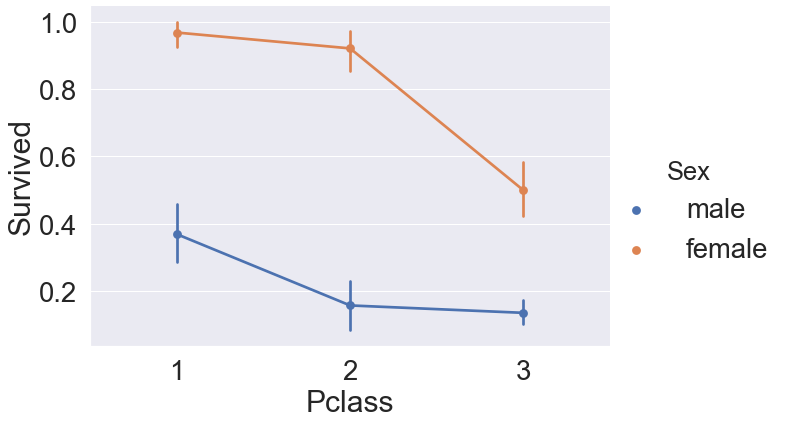

In [19]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)

모든 클래스에서 female과 male의 생존비를 볼 수 있습니다.

In [20]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


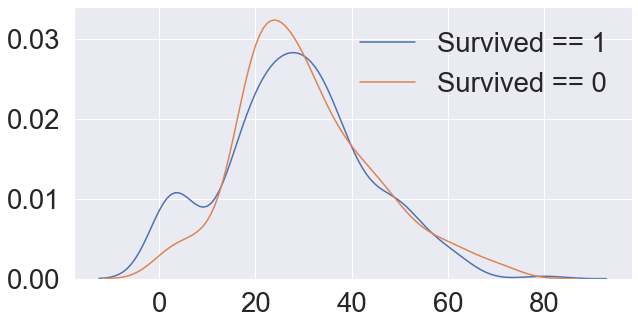

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

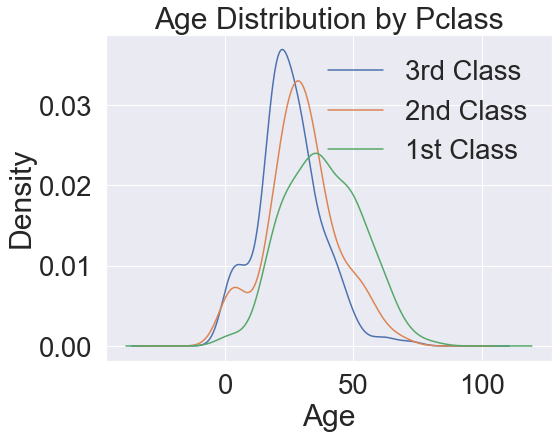

In [22]:
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution by Pclass')
plt.legend(['3rd Class','2nd Class','1st Class'])

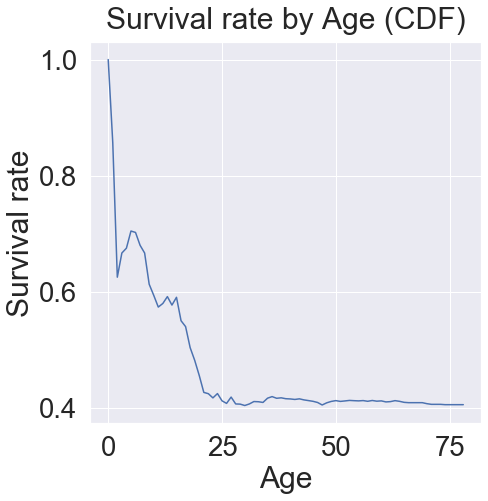

In [23]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize = (7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate by Age (CDF)', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Age')
plt.show()

나이가 어릴수록 생존확률이 더 높습니다.

고로 
- 나이가 어리거나
- 여자이고
- Pclass가 높을수록
생존확률이 높아지는것을 확인할 수 있습니다.


#### Embarked 

In [24]:
df_train['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

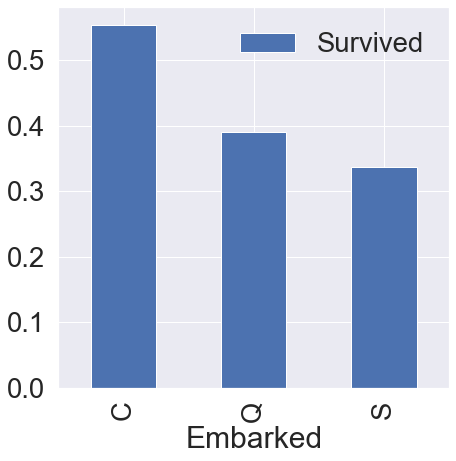

In [25]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived',
                                                                                            ascending = False).plot.bar(ax = ax)

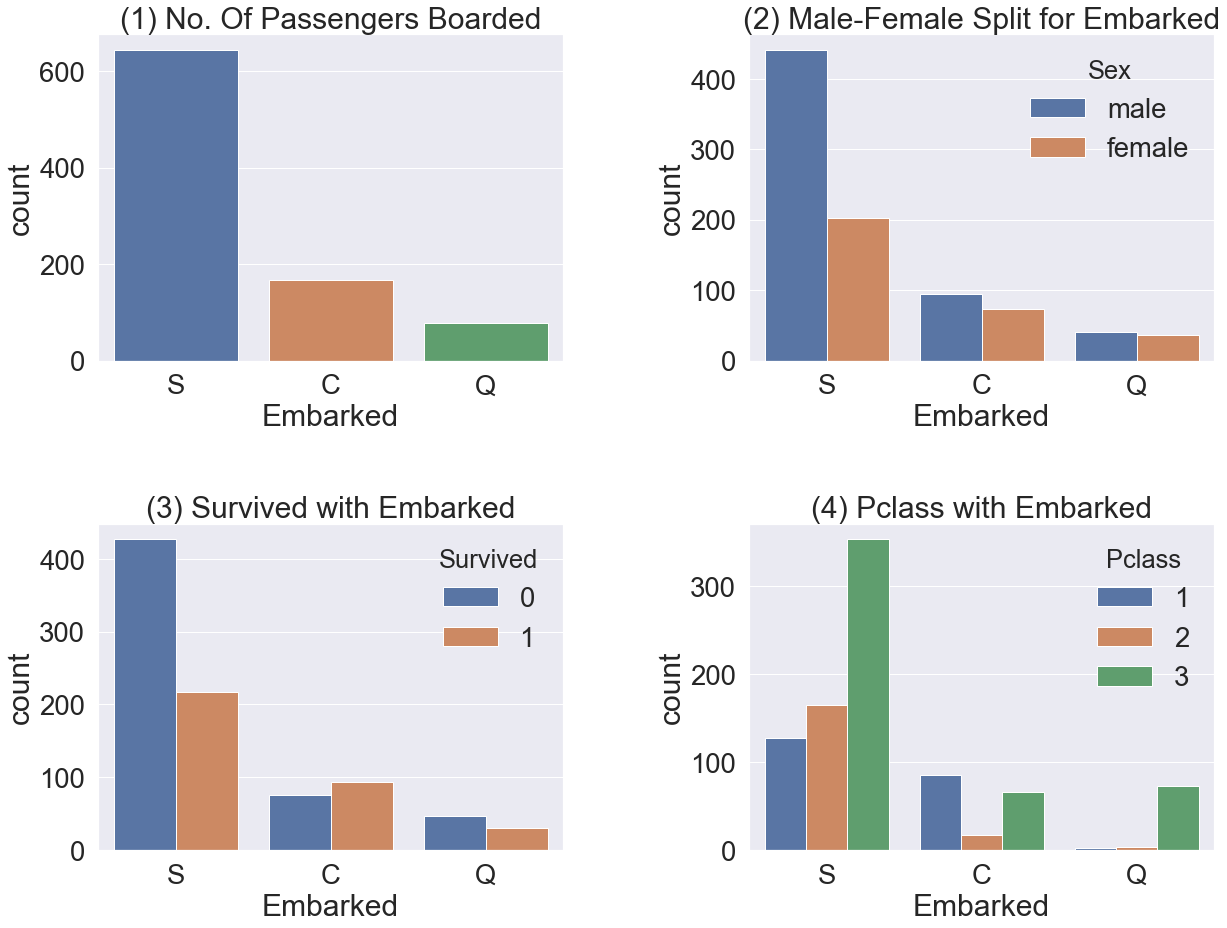

In [26]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data = df_train, ax = ax[0,0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue = "Sex", data = df_train, ax = ax[0,1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue = "Survived", data = df_train, ax = ax[1,0])
ax[1, 0].set_title('(3) Survived with Embarked')
sns.countplot('Embarked', hue = "Pclass", data = df_train, ax = ax[1,1])
ax[1, 1].set_title('(4) Pclass with Embarked')
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

#### S embarked 특징
- 가장 많은 인원
- 남자의 비율이 상대적으로 높음
- 3rd class 비율이 높음


#### Family (sibsp + parch)


In [27]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1


In [28]:
print("Max Family Size: ", df_train['FamilySize'].max())
print("Min Family Size: ", df_test['FamilySize'].min())

Max Family Size:  11
Min Family Size:  1


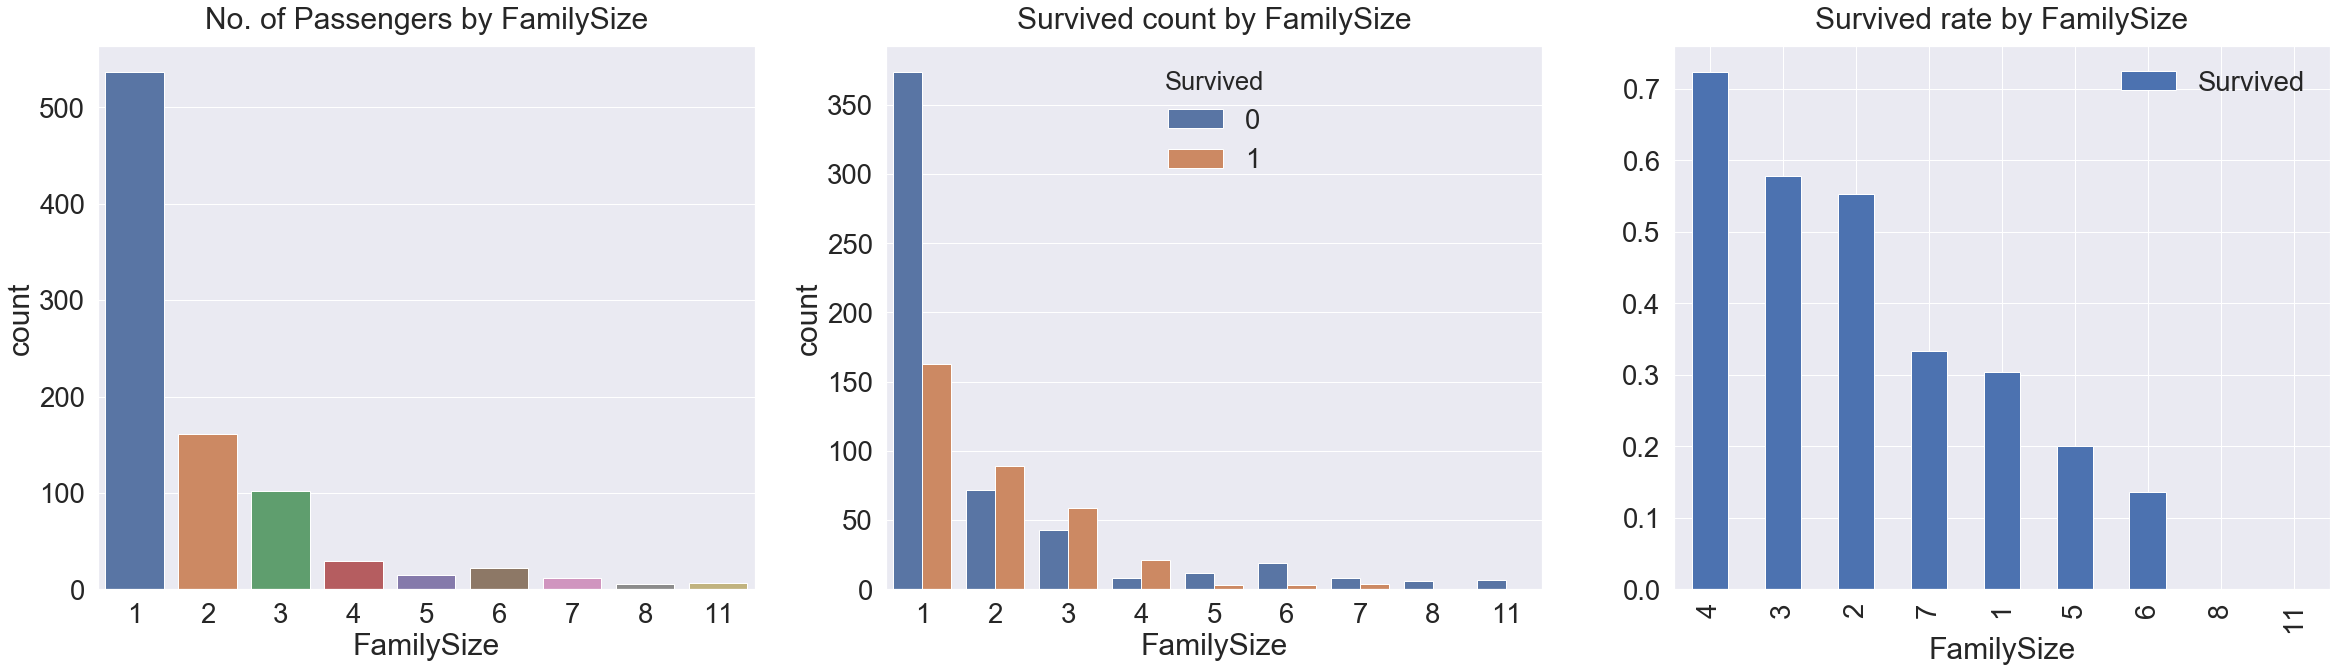

In [29]:
f, ax = plt.subplots(1, 3, figsize = (40,10))
sns.countplot("FamilySize", data= df_train, ax = ax[0])
ax[0].set_title("No. of Passengers by FamilySize", y = 1.02)

sns.countplot("FamilySize", hue = "Survived", data= df_train, ax = ax[1])
ax[1].set_title("Survived count by FamilySize", y = 1.02)

df_train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = True).mean().sort_values(by = 
                                                                                                "Survived", ascending = False).plot.bar(ax = ax[2])
ax[2].set_title("Survived rate by FamilySize", y = 1.02)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Fare

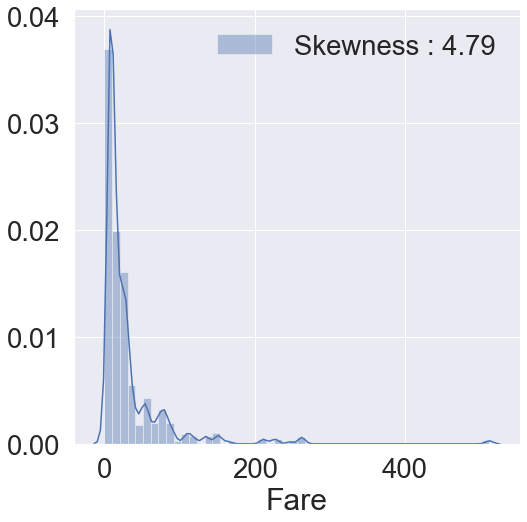

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].
                                                                                  skew(), ax = ax))
g = g.legend(loc = 'best')

#### 결측치 처리, 데이터 정규화(log 이용)
- Feature engineering

In [31]:


df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0) 

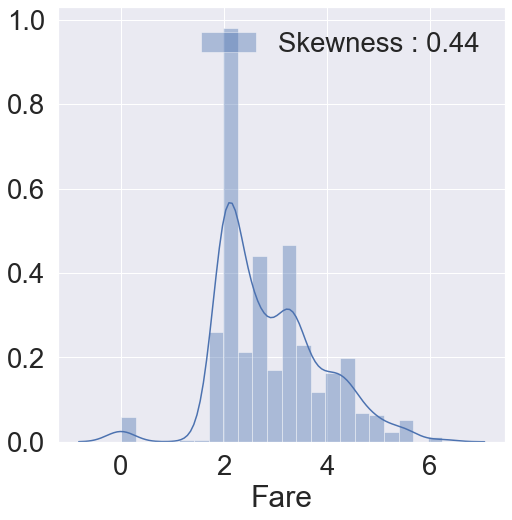

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].
                                                                                  skew(), ax = ax))
g = g.legend(loc = 'best')

#### Cabin

In [33]:
df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [34]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


In [35]:
### null 값이 많아서 고려하기 힘듭니다.

In [36]:
### 특성 공학(Feature engineering) 진행하기

In [37]:
df_train["Age"].isnull().sum()

177

In [38]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [39]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = "summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [40]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [41]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


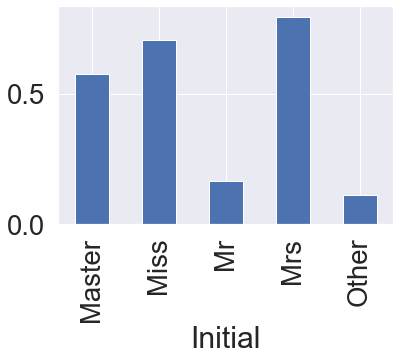

In [42]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

#### Null 데이터 처리하기

In [43]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

승객들의 Age값을 호칭별 기준으로 평균값을 구해 채웠습니다.

In [44]:
df_train['Embarked'].fillna('S', inplace = True)

In [45]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Cabin    687
dtype: int64

In [46]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

Cabin    327
dtype: int64

In [47]:
df_test['Embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [48]:
print("Embarked Null Data Num:", sum(df_train['Embarked'].isnull()) )

Embarked Null Data Num: 0


#### Change Age (continuous to categorical)

In [49]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [50]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

#### String to Int

In [51]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0,'Miss': 1,'Mr': 2,'Mrs': 3,'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0,'Miss': 1,'Mr': 2,'Mrs': 3,'Other': 4})

In [52]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [53]:
df_train['Embarked'].isnull().any(), df_train['Embarked'].dtypes

(False, dtype('int64'))

In [54]:
df_test['Embarked'].isnull().any(), df_test['Embarked'].dtypes

(False, dtype('int64'))

In [55]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

#### 데이터 상관관계 분석

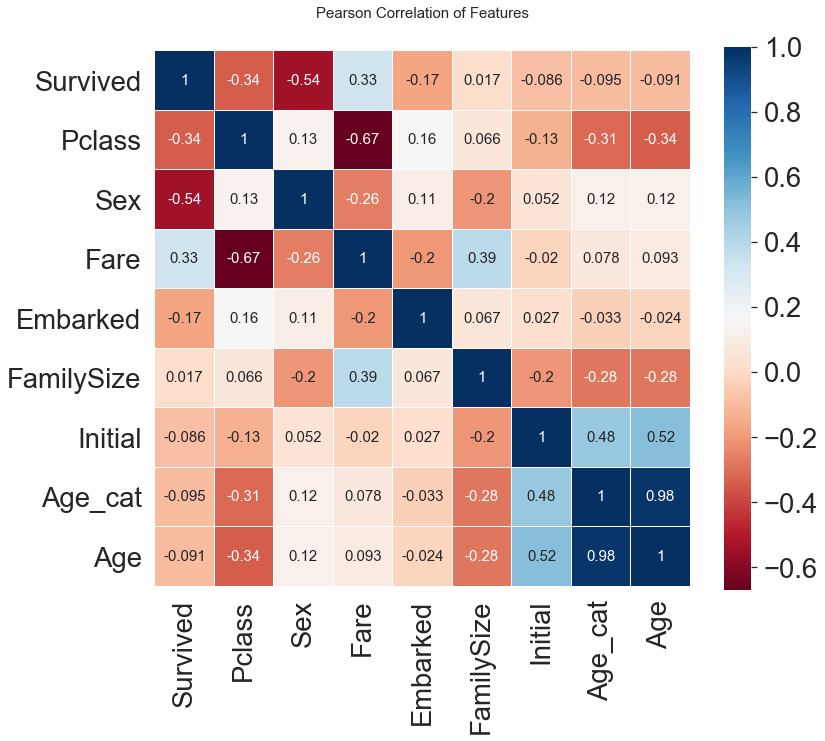

In [56]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked',
                        'FamilySize','Initial','Age_cat','Age']]
colormap = plt.cm.RdBu
plt.figure(figsize = (12, 10))
plt.title('Pearson Correlation of Features', y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square = True,
           cmap = colormap, linecolor = 'white', annot = True, annot_kws={"size":15})

del heatmap_data

위에서 서로 강한 상관관계를 가지는 feature를 확인합니다.  
(1 또는 -1에 가깝다면 두 feature는 강한 종속성을 가지게 되므로 처리해줄 필요가 있습니다.)  
이 경우는 그런 경우가 없습니다.  

#### One-hot Encoding on Initial and Embarked  

카테고리형 데이터를 one-hot encoding 해줍니다.  
이 과정을 통해 class간의 데이터 종속성을 제거해줍니다. (Orthogonal)  

In [57]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [58]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [59]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')


++) category가 100개가 넘어가는 것처럼 class가 많아질 경우 학습시 버거워질 수 있습니다.  
(차원의 저주)  
--> 해결책 필요될 수 있습니다.  

#### Drop columns

In [60]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],
              axis = 1, inplace = True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],
              axis = 1, inplace = True)

In [61]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [62]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [63]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


In [64]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

#### 모델 구축 및 학습

생존유무를 구하는 Binary Classification 문제입니다.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


#### Preparation


In [66]:
X_train_values = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test_values = df_test.values

In [67]:
X_train_values.shape, X_test_values.shape

((891, 14), (418, 14))

In [68]:
X_train_values

array([[ 3.,  1., 22., ...,  0.,  0.,  1.],
       [ 1.,  0., 38., ...,  1.,  0.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0., 22., ...,  0.,  0.,  1.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 3.,  1., 32., ...,  0.,  1.,  0.]])

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_values, target_label,
                                                     test_size = 0.2, random_state = 2018) 

In [70]:
y_train.shape, y_valid.shape

((712,), (179,))

sklearn에서는 여러 머신러닝 알고리즘을 지원해준다고 합니다.

+) 지원하는 알고리즘, 파라미터 정보들  
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

--> 여러 파라미터들을 조정함으로써 모델을 개선할 수 있다고 합니다.


#### Model generation and prediction

In [71]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_valid)

In [72]:
print('Y_Vaild Number :{}'.format(y_valid.shape[0]))
print('X_Valid Accuracy :{:.2f}%'.format(100*metrics.accuracy_score(prediction, y_valid)))

Y_Vaild Number :179
X_Valid Accuracy :81.01%


Feature Importance에 대해 알아볼것입니다.

In [73]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

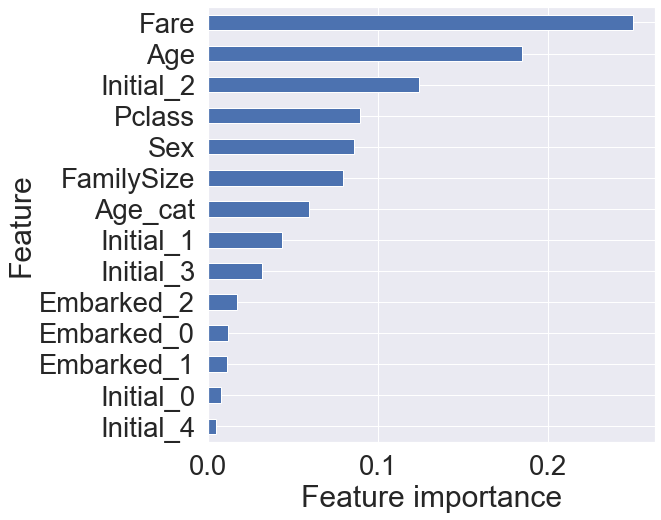

In [74]:
plt.figure(figsize = (8,8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#### Keras 기반의 NN모델 구축

In [75]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam, SGD

In [76]:
nn_model = Sequential()
nn_model.add(Dense(32, activation = 'relu', input_shape = (14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation = 'sigmoid'))

Loss = 'binary_crossentropy'
nn_model.compile(loss = Loss, optimizer = Adam(), metrics = ['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [ ]:
"""
history = nn_model.fit(X_train, Y_train,
            batch_size = 64,
            epochs = 500,
            validation_data = (X_Valid, Y_Valid),
            verbose = 1)

"""